In [2]:
cd pyml

/Users/watanabeshingo/Desktop/ml/pyml


Text(0, 0.5, 'Temperature')

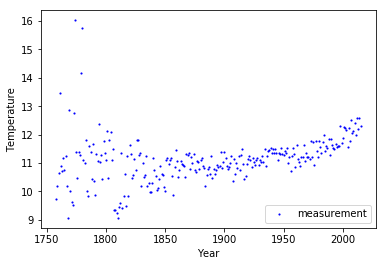

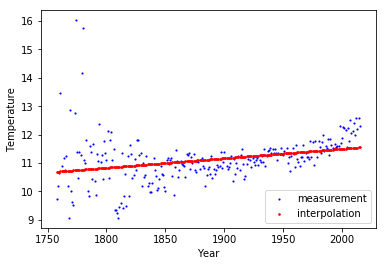

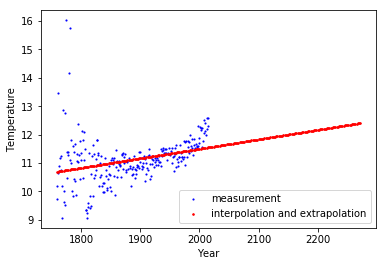

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
d = pd.read_csv('GlobalTemperatures.csv')
offset = 100
date = d['dt'][offset::12]
year = np.array([int(e.split('-')[0]) for e in date])
temperature = d['LandAverageTemperature'][offset::12]
lr = linear_model.LinearRegression()
lr.fit(year.reshape((-1,1)), temperature.values)
year_test = np.linspace(year.min(), year.max(), len(year))
temperature_predict = lr.predict(year_test.reshape((-1,1)))

fig, ax = plt.subplots()
ax.scatter(year, temperature, label='measurement', c='b', marker='.', s=5)
ax.legend(loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

fig, ax = plt.subplots()
ax.scatter(year, temperature, label='measurement', c='b', marker='.', s=5)
ax.scatter(year_test, temperature_predict, c='red', marker='.', s=10, label='interpolation')
ax.legend(loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

fig, ax = plt.subplots()
year_with_future_test = np.linspace(year.min(), year.max() + (year.max() - year.min()), len(year))
temperature_with_future_predict = lr.predict(year_with_future_test.reshape((-1,1)))
ax.scatter(year, temperature, label='measurement', c='b', marker='.', s=5)
ax.scatter(year_with_future_test, temperature_with_future_predict, c='red', marker='.', s=10, label='interpolation and extrapolation')
ax.legend(loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

In [34]:
#練習問題15, 16
import numpy as np

def linear_nn(x, w):
  # return sigmoid(np.matmul(x,w))
  return np.matmul(x,w)

weight = np.array((lr.coef_[0], lr.intercept_))
print(weight)
error_list = []
for x, y in zip(year, temperature):
  error_list.append(linear_nn(np.array((x,1)), weight) - y)

np.array([error ** 2 for error in error_list]).mean() ** (1/2)

[3.34114839e-03 4.81563286e+00]


0.7868232851513102

In [35]:
#練習問題17
#数値微分　解析的な微分じゃないから実行結果ちょっとおかしい
def numerical_gradient(f, x):
    h = 1e-4 # 0.001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        temp_val = x[idx]
        x[idx] = temp_val + h
        fxh1 = f(x)
        
        x[idx] = temp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2)/ (2*h)
        x[idx] = temp_val
    return grad
    
def gradient_descent(f, init_x, lr=0.01, step_num=10):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        print(x)
    return x

def linear_nn(x, w):
    x_with_bias = np.c_[x, np.ones(x.shape[0])]
    return np.matmul(x_with_bias,w)

def loss_function(x):
    error_list = []
    for x, y in zip(year, temperature):
        error_list.append(linear_nn(np.array((x,1)), weight) - y)
    
    return np.array([error ** 2 for error in error_list]).sum()

weight = np.array((lr.coef_[0], lr.intercept_))

gradient_descent(loss_function, weight, 0.1, 10)

[325.06968234 329.88197405]
[-5.98193548e+10 -3.16927326e+07]
[ 1.12589990e+19 -3.16927326e+07]
[ 1.12589990e+19 -3.16927326e+07]
[ 1.12589990e+19 -3.16927326e+07]
[ 1.12589990e+19 -3.16927326e+07]
[ 1.12589990e+19 -3.16927326e+07]
[ 1.12589990e+19 -3.16927326e+07]
[ 1.12589990e+19 -3.16927326e+07]
[ 1.12589990e+19 -3.16927326e+07]


array([ 1.12589990e+19, -3.16927326e+07])

In [30]:
print(weight)

[ 1.12589990e+19 -3.16927326e+07]
